In [88]:
!python --version


Python 3.12.4


In [1]:
import pandas as pd
import numpy as np
# Set display option to show all columns
pd.set_option('display.max_columns', None)


In [2]:
pd.set_option('display.max_columns', None)

In [4]:
file_path = "Data/product_sku_info_with_rgb_review_v2.pkl"
df = pd.read_pickle(file_path)


In [5]:
df.columns

Index(['reviewID', 'Rating', 'Title', 'ReviewText', 'Helpfulness',
       'IsRecommended', 'SubmissionTime',
       'ContextDataValues.skinType.ValueLabel',
       'ContextDataValues.eyeColor.ValueLabel',
       'ContextDataValues.hairColor.ValueLabel',
       'ContextDataValues.skinTone.ValueLabel',
       'ContextDataValues.age.ValueLabel',
       'ContextDataDistribution.skinConcerns.ValueLabel', 'productID', 'skuID',
       'Name', 'Brand', 'BrandExternalId', 'CategoryId', 'TotalReviewCount',
       'ReviewStatistics', 'AverageOverallRating', 'FirstSubmissionTime',
       'RecommendedCount', 'NotRecommendedCount', 'RatingDistribution',
       'ContextDataDistribution.age.Values',
       'ContextDataDistribution.skinType.Values',
       'ContextDataDistribution.skinConcerns.Values',
       'ContextDataDistribution.skinTone.Values',
       'ContextDataDistribution.eyeColor.Values',
       'ContextDataDistribution.hairColor.Values', 'cover_image_base64',
       'lipstick_image_base64'

In [6]:
key_fields = [
    'reviewID', 'Rating', 'Title', 'ReviewText', 'Helpfulness', 'IsRecommended', 
    'SubmissionTime', 'ContextDataValues.skinType.ValueLabel', 
    'ContextDataValues.eyeColor.ValueLabel', 'ContextDataValues.hairColor.ValueLabel', 
    'ContextDataValues.skinTone.ValueLabel', 'ContextDataValues.age.ValueLabel', 
    'productID', 'skuID', 
    'cover_image_base64', 'lipstick_image_base64', 'avg_rgb', 'color_description', 
    'brandName', 'displayName', 'heroImage', 'altImage',
 
]

# Create the new DataFrame with only the selected columns
df_review = df[key_fields]

In [7]:
df_review['ContextDataValues.skinTone.ValueLabel'].unique()

array(['Tan', 'Fair', 'Olive', 'Light', 'Medium', nan, 'Deep',
       'Porcelain', 'Dark', 'Ebony', 'lightMedium', 'mediumTan',
       'fairLight', 'Rich', 'notSure'], dtype=object)

## Review df

In [8]:
df_review.head()

,reviewID,Rating,Title,ReviewText,Helpfulness,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,productID,skuID,cover_image_base64,lipstick_image_base64,avg_rgb,color_description,brandName,displayName,heroImage,altImage
0,178423293,5,Run and buy,The perfect oxblood! This lipstick is the bomb...,NaN,True,2021-04-23T19:26:02.000+00:00,Normal,Brown,Black,Tan,NaN,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
1,157294043,1,Yuck!,"Lipstick is really thick, dries very fast and ...",0.090909,False,2020-05-30T21:19:12.000+00:00,Normal,Blue,Blonde,Fair,35-44,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
2,155553938,1,Absolutely terrible,This is the very first makeup product I have E...,0.545455,False,2020-04-28T20:31:58.000+00:00,Combination,Brown,Brunette,Olive,NaN,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
3,143100814,1,Liquid Lipstick fail,Absolutely the worst product I have put on my ...,0.333333,False,2020-03-05T18:25:21.000+00:00,Normal,Brown,Brunette,Light,NaN,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
4,141256552,2,What an unfortunate lipstick,"I have given this lipstick multiple wears, but...",0.500000,False,2020-01-25T17:54:14.000+00:00,Combination,Hazel,Brunette,Light,NaN,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...


In [9]:
df_review.isnull().sum()

reviewID                                       0
Rating                                         0
Title                                      34785
ReviewText                                   193
Helpfulness                                79570
IsRecommended                              34645
SubmissionTime                                 0
ContextDataValues.skinType.ValueLabel      31397
ContextDataValues.eyeColor.ValueLabel      25302
ContextDataValues.hairColor.ValueLabel     51465
ContextDataValues.skinTone.ValueLabel      30405
ContextDataValues.age.ValueLabel          112180
productID                                      0
skuID                                          0
cover_image_base64                             0
lipstick_image_base64                          0
avg_rgb                                    78359
color_description                          78809
brandName                                      0
displayName                                    0
heroImage           

In [10]:
df_review.describe()

,Rating,Helpfulness
count,143185.000000,63615.000000
mean,4.314963,0.772947
std,1.117483,0.336317
min,1.000000,0.000000
25%,4.000000,0.666667
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [11]:
# Get count of non-NaN and NaN values for each column
value_counts = pd.DataFrame({
    "Non-NaN Count": df_review.notna().sum(),
    "NaN Count": df_review.isna().sum(),
    "Total Count": len(df)
})

# Add percentage of NaN values for better insight
value_counts["NaN Percentage"] = (value_counts["NaN Count"] / value_counts["Total Count"]) * 100

# Display the value count summary
value_counts


,Non-NaN Count,NaN Count,Total Count,NaN Percentage
reviewID,143185,0,143185,0.000000
Rating,143185,0,143185,0.000000
Title,108400,34785,143185,24.293746
ReviewText,142992,193,143185,0.134791
Helpfulness,63615,79570,143185,55.571463
IsRecommended,108540,34645,143185,24.195970
SubmissionTime,143185,0,143185,0.000000
ContextDataValues.skinType.ValueLabel,111788,31397,143185,21.927576
ContextDataValues.eyeColor.ValueLabel,117883,25302,143185,17.670845
ContextDataValues.hairColor.ValueLabel,91720,51465,143185,35.943011


In [12]:
df_review.columns

Index(['reviewID', 'Rating', 'Title', 'ReviewText', 'Helpfulness',
       'IsRecommended', 'SubmissionTime',
       'ContextDataValues.skinType.ValueLabel',
       'ContextDataValues.eyeColor.ValueLabel',
       'ContextDataValues.hairColor.ValueLabel',
       'ContextDataValues.skinTone.ValueLabel',
       'ContextDataValues.age.ValueLabel', 'productID', 'skuID',
       'cover_image_base64', 'lipstick_image_base64', 'avg_rgb',
       'color_description', 'brandName', 'displayName', 'heroImage',
       'altImage'],
      dtype='object')

In [13]:
face_features = ['ContextDataValues.skinType.ValueLabel',
       'ContextDataValues.eyeColor.ValueLabel',
       'ContextDataValues.hairColor.ValueLabel',
       'ContextDataValues.skinTone.ValueLabel',
       'ContextDataValues.age.ValueLabel']

In [14]:
rating_features = ['Rating',  'Helpfulness',
       'IsRecommended']

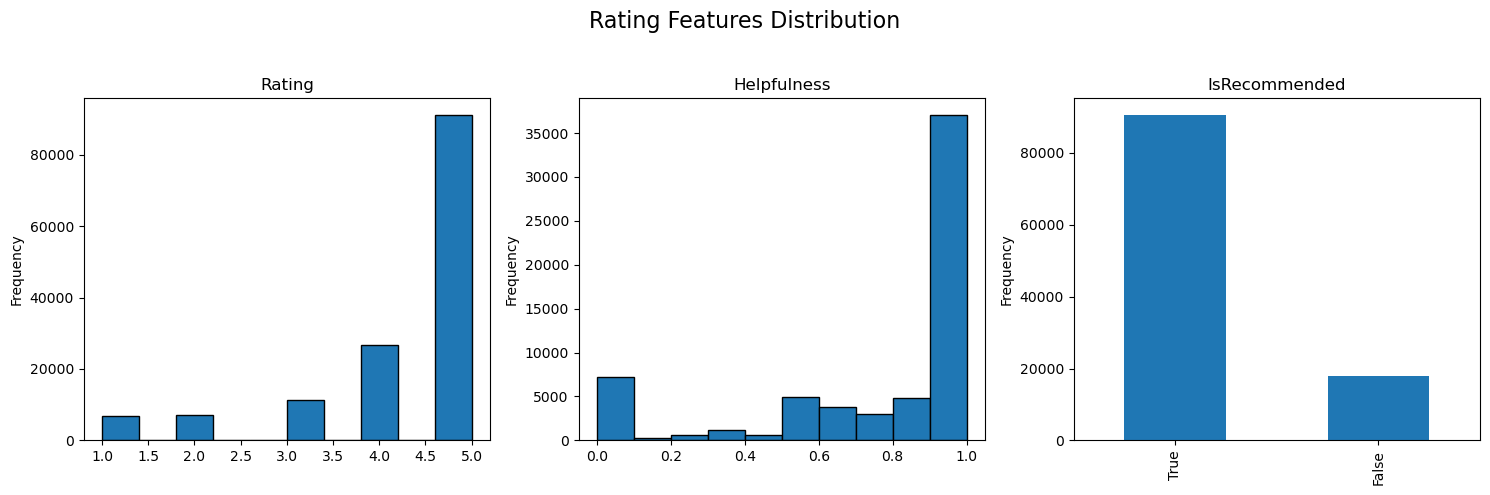

In [15]:
import matplotlib.pyplot as plt

# Set up a grid with three columns (one row since we only have three features)
num_features = len(rating_features)
rows = (num_features + 2) // 3  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5))
fig.suptitle("Rating Features Distribution", fontsize=16)
axes = axes.flatten()  # Flatten to easily iterate over axes

# Plot each feature in a subplot
for i, feature in enumerate(rating_features):
    ax = axes[i]
    if df_review[feature].dtype == 'object':
        # If the feature is categorical, use a bar plot
        df_review[feature].value_counts().plot(kind='bar', ax=ax)
    else:
        # If the feature is numerical, use a histogram
        df_review[feature].plot(kind='hist', bins=10, edgecolor='black', ax=ax)
    ax.set_title(feature)  # Use the full column name as the title
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Turn off any unused subplots (in case of an incomplete row)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()


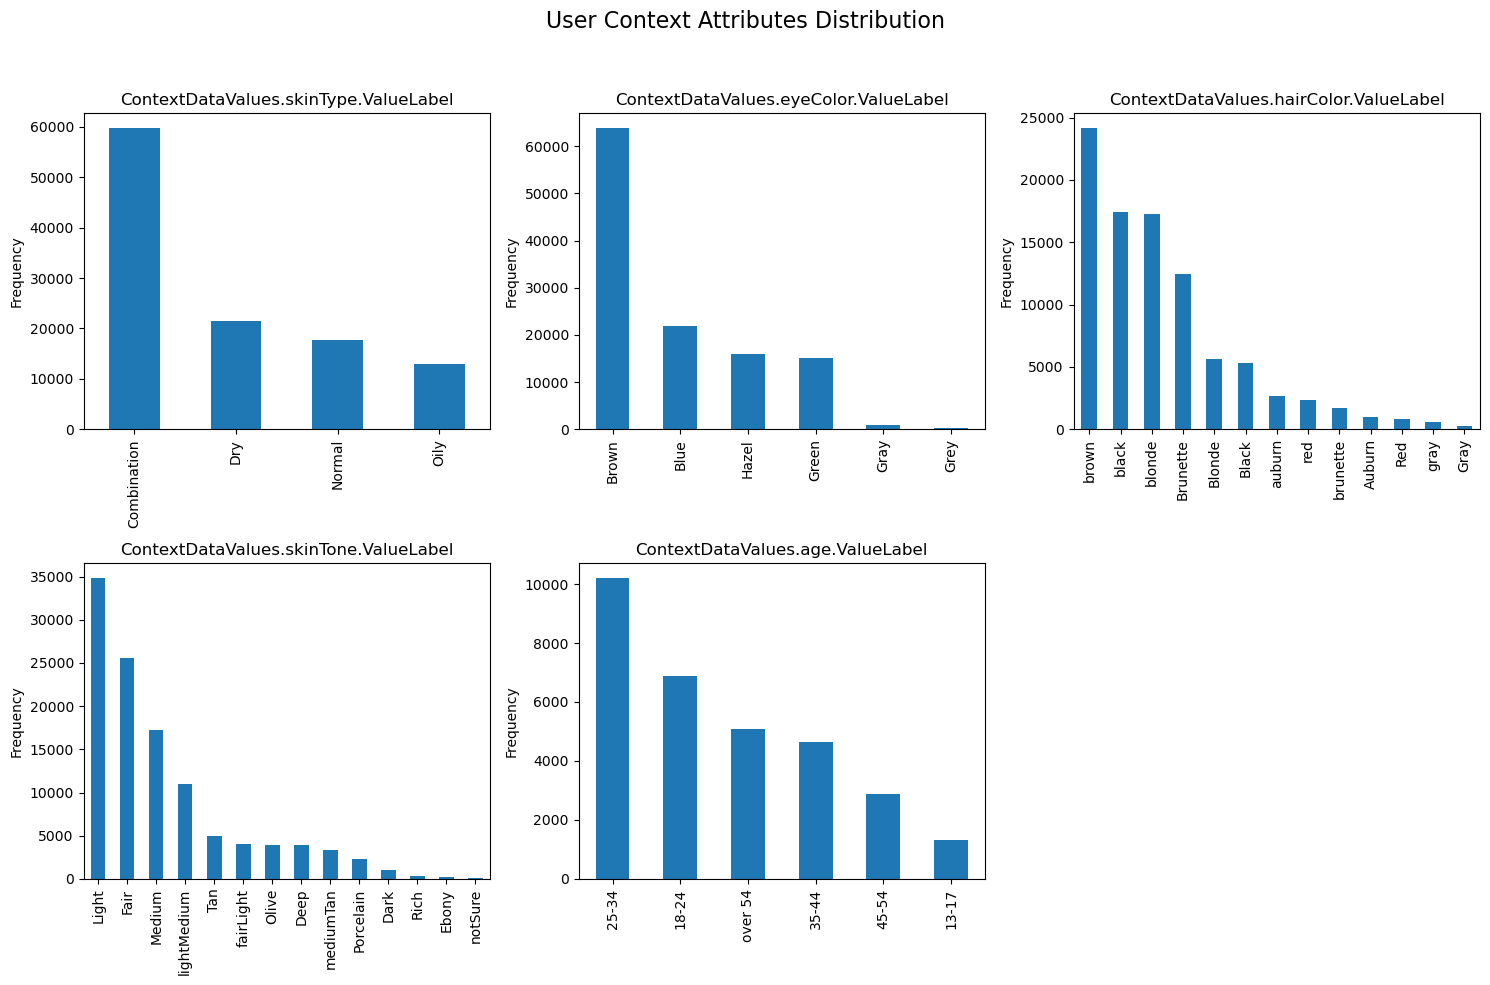

In [16]:
# Set up a grid with three columns and as many rows as needed
num_features = len(face_features)
rows = (num_features + 2) // 3  # Calculate the number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 10))
fig.suptitle("User Context Attributes Distribution", fontsize=16)
axes = axes.flatten()  # Flatten to easily iterate over axes

# Plot each feature in a subplot
for i, feature in enumerate(face_features):
    ax = axes[i]
    df_review[feature].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(feature)  # Use the full column name as the title
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.show()

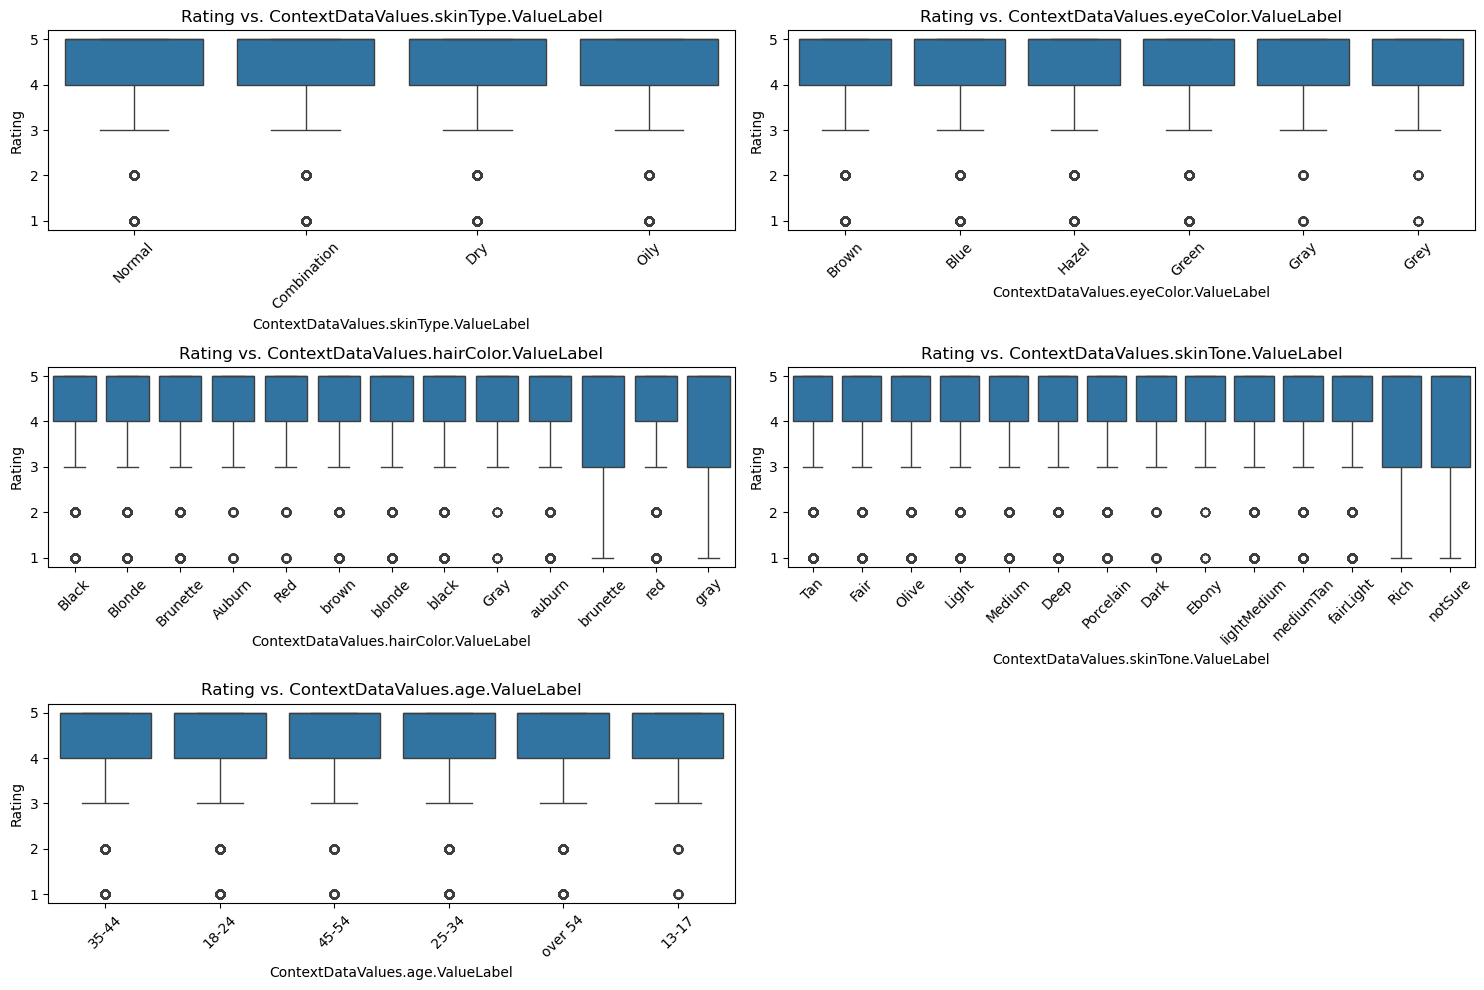

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(face_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df_review, x=feature, y='Rating')
    plt.title(f'Rating vs. {feature}')
    plt.xticks(rotation=45)
    plt.xlabel(feature)
    plt.ylabel('Rating')

plt.tight_layout()
plt.show()


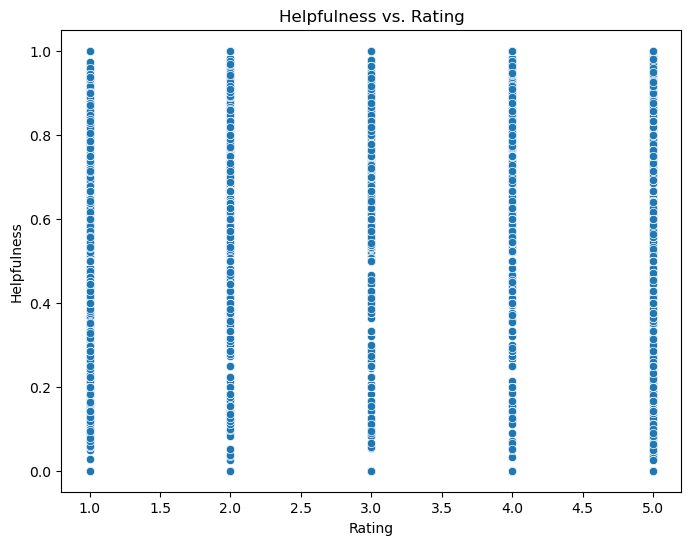

In [18]:
# Scatter plot for Helpfulness vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_review, x='Rating', y='Helpfulness')
plt.title('Helpfulness vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Helpfulness')
plt.show()


## SKU analysis

In [19]:
df_review.columns

Index(['reviewID', 'Rating', 'Title', 'ReviewText', 'Helpfulness',
       'IsRecommended', 'SubmissionTime',
       'ContextDataValues.skinType.ValueLabel',
       'ContextDataValues.eyeColor.ValueLabel',
       'ContextDataValues.hairColor.ValueLabel',
       'ContextDataValues.skinTone.ValueLabel',
       'ContextDataValues.age.ValueLabel', 'productID', 'skuID',
       'cover_image_base64', 'lipstick_image_base64', 'avg_rgb',
       'color_description', 'brandName', 'displayName', 'heroImage',
       'altImage'],
      dtype='object')

In [20]:
sku_feature = ['productID', 'skuID',
       'cover_image_base64', 'lipstick_image_base64', 'avg_rgb',
       'color_description', 'brandName', 'displayName', 'heroImage',
       'altImage']

In [21]:
# Select only the sku_feature columns from the review table
df_sku = df_review[sku_feature]

# Drop duplicate rows based on skuID to ensure uniqueness
df_sku = df_sku.drop_duplicates(subset='skuID').reset_index(drop=True)

# Display the resulting product table
df_sku.head()

,productID,skuID,cover_image_base64,lipstick_image_base64,avg_rgb,color_description,brandName,displayName,heroImage,altImage
0,P404831,1790708,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
1,P404831,1786870,,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[149.88503086419752, 19.90277777777778, 44.338...",American Doll classic blue red,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
2,P404831,1790666,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
3,P404831,2036408,/9j/4AAQSkZJRgABAQAAAQABAAD/4gIcSUNDX1BST0ZJTE...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[118.09645061728395, 55.09645061728395, 74.096...",Poet dusty mauve,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...
4,P404831,P404831,,,None,NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...


In [22]:
df_sku.shape

(2104, 10)

In [23]:
df_sku['productID'].nunique()

302

In [83]:
# Inspect the first few values in avg_rgb column to understand its structure
print(df_sku['avg_rgb'].head())
print(type(df_sku['avg_rgb'].iloc[0]))


0                                            [0, 0, 0]
1    [149.88503086419752, 19.90277777777778, 44.338...
2                                            [0, 0, 0]
3    [118.09645061728395, 55.09645061728395, 74.096...
4                                            [0, 0, 0]
Name: avg_rgb, dtype: object
<class 'list'>


In [93]:
df_review = df_review.dropna(subset=['avg_rgb'])

In [94]:
from sklearn.cluster import KMeans
import pandas as pd
from scipy.stats import mode
import numpy as np
import ast

# Fill None or NaN values in avg_rgb with a default value, e.g., [0, 0, 0]
df_sku['avg_rgb'] = df_sku['avg_rgb'].apply(lambda x: x if x is not None else [0, 0, 0])

# Extract R, G, B values from avg_rgb column, handling lists correctly
df_sku[['R', 'G', 'B']] = pd.DataFrame(df_sku['avg_rgb'].tolist(), index=df_sku.index)


In [95]:
df_sku.head()

,productID,skuID,cover_image_base64,lipstick_image_base64,avg_rgb,color_description,brandName,displayName,heroImage,altImage,R,G,B,ColorCluster,ClusterColorDescription
0,P404831,1790708,,,"[0, 0, 0]",NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...,0.000000,0.000000,0.000000,1,Bare Pink sheer pink tint
1,P404831,1786870,,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[149.88503086419752, 19.90277777777778, 44.338...",American Doll classic blue red,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...,149.885031,19.902778,44.338735,11,25* Goldie Red soft matte red lipstick color
2,P404831,1790666,,,"[0, 0, 0]",NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...,0.000000,0.000000,0.000000,1,Bare Pink sheer pink tint
3,P404831,2036408,/9j/4AAQSkZJRgABAQAAAQABAAD/4gIcSUNDX1BST0ZJTE...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[118.09645061728395, 55.09645061728395, 74.096...",Poet dusty mauve,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...,118.096451,55.096451,74.096451,5,011 Black Pink blackend pink that transforms t...
4,P404831,P404831,,,"[0, 0, 0]",NaN,Anastasia Beverly Hills,Smudge-Proof Matte Liquid Lipstick,https://www.sephora.com/productimages/sku/s203...,https://www.sephora.com/productimages/sku/s203...,0.000000,0.000000,0.000000,1,Bare Pink sheer pink tint


     skuID         R         G         B  ColorCluster  \
0  1790708  0.000000  0.000000  0.000000             1   
1  1786870  0.587784  0.078050  0.173877            11   
2  1790666  0.000000  0.000000  0.000000             1   
3  2036408  0.463123  0.216065  0.290574             5   
4  P404831  0.000000  0.000000  0.000000             1   

                             ClusterColorDescription  
0                          Bare Pink sheer pink tint  
1       25* Goldie Red soft matte red lipstick color  
2                          Bare Pink sheer pink tint  
3  011 Black Pink blackend pink that transforms t...  
4                          Bare Pink sheer pink tint  


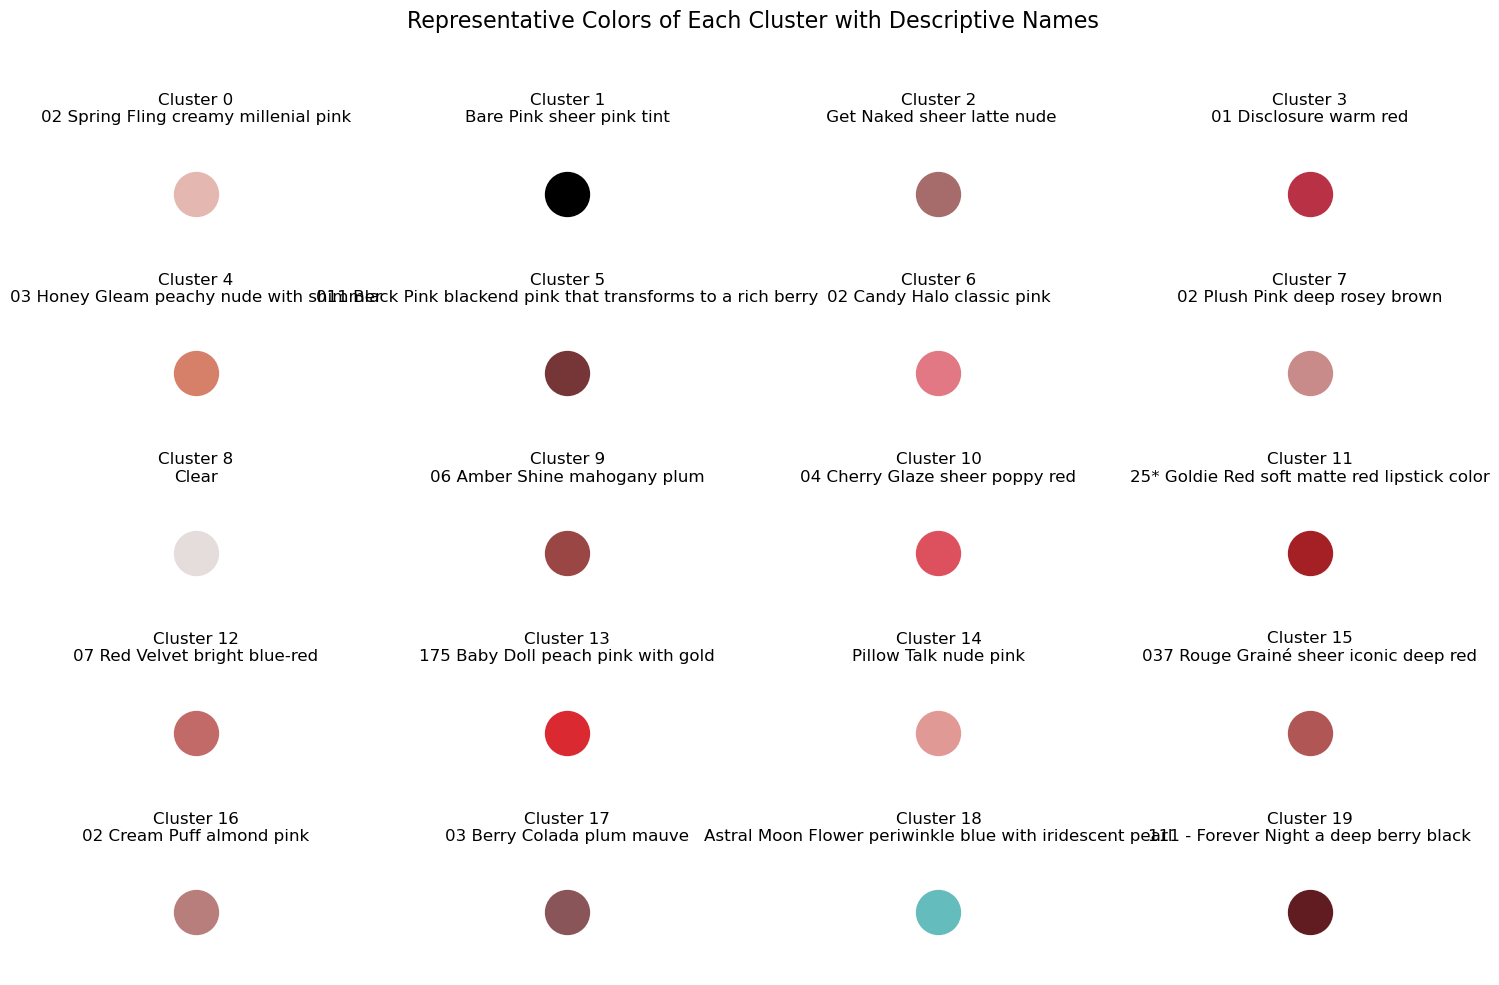

In [96]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from scipy.stats import mode
import matplotlib.pyplot as plt

# Normalize RGB values
df_sku[['R', 'G', 'B']] = df_sku[['R', 'G', 'B']] / 255.0  # RGB normalization

# Set the number of clusters to 15
n_clusters = 20

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_sku['ColorCluster'] = kmeans.fit_predict(df_sku[['R', 'G', 'B']])

# Cluster Centers (for reference to see average color of each cluster)
cluster_centers = kmeans.cluster_centers_

# Map cluster centers back to RGB scale (0-255) for visualization purposes
cluster_colors = (cluster_centers * 255).astype(int)

# Step 3: Assign descriptive names based on color descriptions in each cluster
# Create a dictionary to store the most common color description for each cluster
cluster_descriptions = {}

for cluster in range(n_clusters):
    # Filter data for the current cluster
    cluster_data = df_sku[df_sku['ColorCluster'] == cluster]
    
    # Find the most common color description (mode) in this cluster
    most_common_description = (
        cluster_data['color_description'].mode().iloc[0]
        if not cluster_data['color_description'].mode().empty else "Unknown"
    )
    
    # Store the description in the dictionary
    cluster_descriptions[cluster] = most_common_description

# Map the color descriptions to the clusters
df_sku['ClusterColorDescription'] = df_sku['ColorCluster'].map(cluster_descriptions)

# Display the resulting DataFrame with clusters and assigned color descriptions
print(df_sku[['skuID', 'R', 'G', 'B', 'ColorCluster', 'ClusterColorDescription']].head())

# Number of rows required to display clusters in 5 columns
n_columns = 4
n_rows = (n_clusters + n_columns - 1) // n_columns  # Calculate rows needed for 5 columns

# Set up a grid of subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, n_rows * 2))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Plot each cluster's representative color with the assigned description
for i, color in enumerate(cluster_colors):
    # Normalize color values back to 0-1 range for plotting
    normalized_color = (color[0] / 255.0, color[1] / 255.0, color[2] / 255.0)  # Convert to tuple
    axes[i].scatter(0.5, 0.5, s=1000, color=normalized_color)
    axes[i].set_title(f"Cluster {i}\n{cluster_descriptions[i]}")
    axes[i].axis('off')  # Turn off axis

# Turn off any unused subplots if the grid is larger than needed
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.suptitle("Representative Colors of Each Cluster with Descriptive Names", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [97]:
# Ensure df_sku has the cluster information
# df_sku already contains 'ColorCluster' and 'ClusterColorDescription'

# Select only the relevant columns for merging
df_sku_cluster_info = df_sku[['skuID', 'ColorCluster', 'ClusterColorDescription']]

# Merge df_review with df_sku on 'skuID' to add cluster information to df_review
df_review = df_review.merge(df_sku_cluster_info, on='skuID', how='left')

# Display the first few rows of df_review to confirm the new columns
print(df_review[['skuID', 'ColorCluster', 'ClusterColorDescription']].head())


MergeError: Passing 'suffixes' which cause duplicate columns {'ColorCluster_x', 'ClusterColorDescription_x'} is not allowed.

In [98]:
# Assuming `cluster_descriptions` contains the color names, with keys as cluster IDs
# Convert RGB values to hex for visualization
color_map = {
    cluster: {
        "color": f'#{int(r*255):02x}{int(g*255):02x}{int(b*255):02x}', 
        "name": cluster_descriptions[cluster]
    }
    for cluster, (r, g, b) in enumerate(kmeans.cluster_centers_)
}

# Displaying color_map to ensure it's set correctly
print(color_map)


{0: {'color': '#e4b7b0', 'name': '02 Spring Fling creamy millenial pink'}, 1: {'color': '#000000', 'name': 'Bare Pink sheer pink tint'}, 2: {'color': '#a66c6b', 'name': ' Get Naked\u200b sheer latte nude'}, 3: {'color': '#b83145', 'name': '01 Disclosure warm red'}, 4: {'color': '#d78069', 'name': '03 Honey Gleam peachy nude with shimmer'}, 5: {'color': '#763537', 'name': '011 Black Pink blackend pink that transforms to a rich berry'}, 6: {'color': '#e17883', 'name': '02 Candy Halo classic pink'}, 7: {'color': '#c98b89', 'name': '02 Plush Pink deep rosey brown'}, 8: {'color': '#e4dddc', 'name': 'Clear'}, 9: {'color': '#994645', 'name': '06 Amber Shine mahogany plum'}, 10: {'color': '#dd515f', 'name': '04 Cherry Glaze sheer poppy red'}, 11: {'color': '#a42025', 'name': '25* Goldie Red soft matte red lipstick color'}, 12: {'color': '#c26a68', 'name': '07 Red Velvet bright blue-red'}, 13: {'color': '#da2930', 'name': '175 Baby Doll peach pink with gold'}, 14: {'color': '#e19995', 'name': '

In [99]:
plt.figure(figsize=(10, 6))
reviews_per_cluster.plot(
    kind='bar', 
    color=[color_map[i]["color"] for i in reviews_per_cluster.index]
)
plt.title("Number of Reviews per Color Cluster")
plt.xlabel("Color Cluster")
plt.ylabel("Number of Reviews")
plt.xticks(
    range(len(reviews_per_cluster.index)), 
    [f'{i} - {color_map[i]["name"]}' for i in reviews_per_cluster.index], 
    rotation=45, ha="right"
)
plt.show()



NameError: name 'reviews_per_cluster' is not defined

<Figure size 1000x600 with 0 Axes>

/var/folders/pw/h1wlc70x7p70kwqzpbm2s1100000gp/T/ipykernel_24687/2057177263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_review, x='ColorCluster', y='Rating', palette=[color_map[i]["color"] for i in sorted(color_map.keys())])


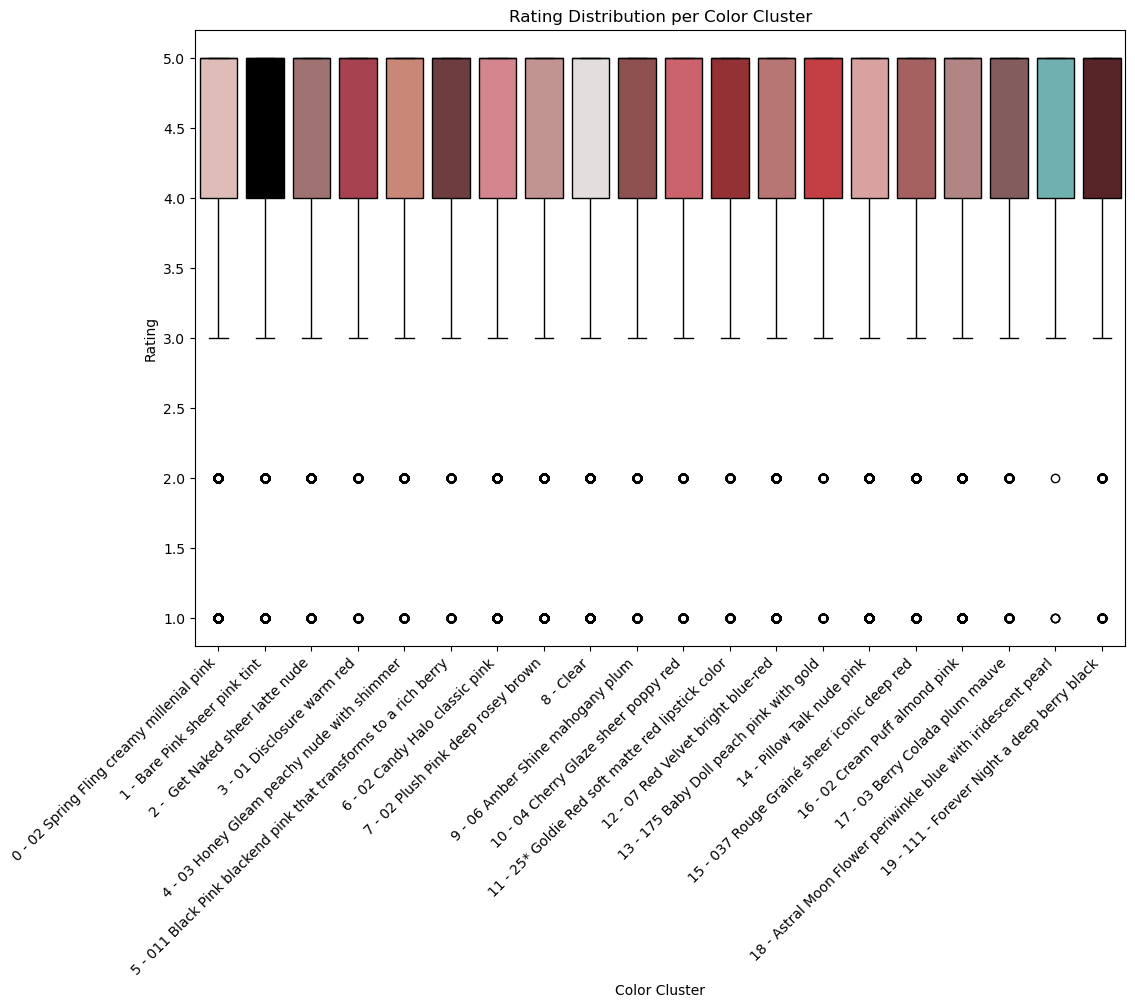

In [100]:
import seaborn as sns

# Set the color palette for clusters based on their RGB colors
sns.set_palette(sns.color_palette([color_map[i]["color"] for i in sorted(color_map.keys())]))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_review, x='ColorCluster', y='Rating', palette=[color_map[i]["color"] for i in sorted(color_map.keys())])
plt.title("Rating Distribution per Color Cluster")
plt.xlabel("Color Cluster")
plt.ylabel("Rating")

# Custom x-tick labels with cluster ID and color name
plt.xticks(
    range(n_clusters), 
    [f'{i} - {color_map[i]["name"]}' for i in range(n_clusters)], 
    rotation=45, ha="right"
)
plt.show()


In [101]:
df_review.columns

Index(['reviewID', 'Rating', 'Title', 'ReviewText', 'Helpfulness',
       'IsRecommended', 'SubmissionTime',
       'ContextDataValues.skinType.ValueLabel',
       'ContextDataValues.eyeColor.ValueLabel',
       'ContextDataValues.hairColor.ValueLabel',
       'ContextDataValues.skinTone.ValueLabel',
       'ContextDataValues.age.ValueLabel', 'productID', 'skuID',
       'cover_image_base64', 'lipstick_image_base64', 'avg_rgb',
       'color_description', 'brandName', 'displayName', 'heroImage',
       'altImage', 'ColorCluster_x', 'ClusterColorDescription_x',
       'ColorCluster_y', 'ClusterColorDescription_y', 'ColorCluster',
       'ClusterColorDescription'],
      dtype='object')

In [102]:
df_review.loc[df_review['skuID'] == '2591048'].head()

,reviewID,Rating,Title,ReviewText,Helpfulness,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,productID,skuID,cover_image_base64,lipstick_image_base64,avg_rgb,color_description,brandName,displayName,heroImage,altImage,ColorCluster_x,ClusterColorDescription_x,ColorCluster_y,ClusterColorDescription_y,ColorCluster,ClusterColorDescription
64655,316211411,5,None,The GXVE Beauty by Gwen Stefani Bubble Pop Ele...,NaN,True,2024-08-08T18:25:49.000+00:00,Combination,Brown,black,NaN,NaN,P502289,2591048,,/9j/4QRNRXhpZgAASUkqAAgAAAAQAAABAwABAAAAwwMAAA...,"[226.2, 142.75, 170.9287037037037]",Out of stock: Candy neutral lilac,GXVE BY GWEN STEFANI,Bubble Pop Electric High-Performance Clean Lip...,https://www.sephora.com/productimages/sku/s259...,https://www.sephora.com/productimages/sku/s259...,14,Pillow Talk nude pink,14,Pillow Talk nude pink,14,Pillow Talk nude pink
64656,316191479,2,None,I like some of the products from this line but...,1.0,False,2024-08-08T13:30:17.000+00:00,Dry,Hazel,NaN,NaN,NaN,P502289,2591048,,/9j/4QRNRXhpZgAASUkqAAgAAAAQAAABAwABAAAAwwMAAA...,"[226.2, 142.75, 170.9287037037037]",Out of stock: Candy neutral lilac,GXVE BY GWEN STEFANI,Bubble Pop Electric High-Performance Clean Lip...,https://www.sephora.com/productimages/sku/s259...,https://www.sephora.com/productimages/sku/s259...,14,Pillow Talk nude pink,14,Pillow Talk nude pink,14,Pillow Talk nude pink
64657,315973576,5,"Love, Love, LOVE IT!",I’m a fan! I cannot get enough of this one. ...,NaN,True,2024-08-05T21:32:18.000+00:00,Normal,Hazel,auburn,Light,NaN,P502289,2591048,,/9j/4QRNRXhpZgAASUkqAAgAAAAQAAABAwABAAAAwwMAAA...,"[226.2, 142.75, 170.9287037037037]",Out of stock: Candy neutral lilac,GXVE BY GWEN STEFANI,Bubble Pop Electric High-Performance Clean Lip...,https://www.sephora.com/productimages/sku/s259...,https://www.sephora.com/productimages/sku/s259...,14,Pillow Talk nude pink,14,Pillow Talk nude pink,14,Pillow Talk nude pink
64658,313631021,5,I am obsessed.,I am so obsessed with this product. It is the ...,1.0,True,2024-07-04T04:14:01.000+00:00,Combination,Green,blonde,Porcelain,NaN,P502289,2591048,,/9j/4QRNRXhpZgAASUkqAAgAAAAQAAABAwABAAAAwwMAAA...,"[226.2, 142.75, 170.9287037037037]",Out of stock: Candy neutral lilac,GXVE BY GWEN STEFANI,Bubble Pop Electric High-Performance Clean Lip...,https://www.sephora.com/productimages/sku/s259...,https://www.sephora.com/productimages/sku/s259...,14,Pillow Talk nude pink,14,Pillow Talk nude pink,14,Pillow Talk nude pink
64659,312037320,1,None,Extremely sticky. Worse than the MAC lipglosse...,1.0,False,2024-06-15T16:28:10.000+00:00,Combination,Green,blonde,Fair,NaN,P502289,2591048,,/9j/4QRNRXhpZgAASUkqAAgAAAAQAAABAwABAAAAwwMAAA...,"[226.2, 142.75, 170.9287037037037]",Out of stock: Candy neutral lilac,GXVE BY GWEN STEFANI,Bubble Pop Electric High-Performance Clean Lip...,https://www.sephora.com/productimages/sku/s259...,https://www.sephora.com/productimages/sku/s259...,14,Pillow Talk nude pink,14,Pillow Talk nude pink,14,Pillow Talk nude pink


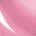

In [103]:
import base64
from PIL import Image
from io import BytesIO

# Extract the base64 string from the Series
base64_string = df_review.loc[df_review['reviewID'] == '316211411', 'lipstick_image_base64'].values[0]

# Decode the base64 string
image_data = base64.b64decode(base64_string)

# Open the image and display it
image = Image.open(BytesIO(image_data))
image


In [104]:
print(df_review.shape,df_review['skuID'].nunique())

(64826, 28) 1132


In [105]:
# for clear cluster: the image file name is not the SKU ID, therefore, it is not possible to fetch the images. One product can have one sku have no image. we can exclude them: 97kk review and 1769 sku , 229 products)
ClusterColorDescription= df_review.groupby(['ColorCluster', 'ClusterColorDescription']).agg(
    Product_Count=('productID', 'nunique'),   # Unique count of productID per cluster
    SKU_Count=('skuID', 'nunique'),           # Unique count of skuID per cluster
    Review_Count=('reviewID', 'nunique')      # Unique count of reviewID per cluster
).reset_index()

ClusterColorDescription

,ColorCluster,ClusterColorDescription,Product_Count,SKU_Count,Review_Count
0,0,02 Spring Fling creamy millenial pink,30,38,3596
1,1,Bare Pink sheer pink tint,9,11,2022
2,2,Get Naked​ sheer latte nude,58,89,4280
3,3,01 Disclosure warm red,32,43,2141
4,4,03 Honey Gleam peachy nude with shimmer,43,55,1761
5,5,011 Black Pink blackend pink that transforms t...,38,68,1734
6,6,02 Candy Halo classic pink,45,63,4714
7,7,02 Plush Pink deep rosey brown,59,95,4955
8,8,Clear,32,33,4547
9,9,06 Amber Shine mahogany plum,45,68,2957


In [106]:
# Create a contingency table for facetone ('ContextDataValues.skinTone.ValueLabel'), cluster color ('ColorCluster'), and average rating
facetone_cluster_rating_table = pd.crosstab(
    [df_review['ContextDataValues.skinTone.ValueLabel'], df_review['ColorCluster']],
    df_review['Rating']
)

# Display the contingency table
print(facetone_cluster_rating_table)



Rating                                              1  2  3  4   5
ContextDataValues.skinTone.ValueLabel ColorCluster                
Dark                                  0             6  0  8  5  40
                                      1             3  1  1  1   5
                                      2             1  0  1  1  12
                                      3             2  0  0  3   3
                                      4             0  0  1  1   4
...                                                .. .. .. ..  ..
notSure                               14            2  0  0  1   5
                                      15            0  1  2  0   1
                                      16            0  0  0  1   4
                                      17            0  0  1  0   0
                                      18            0  0  1  0   0

[270 rows x 5 columns]


In [107]:
# Group by Skin Tone, ColorCluster, and calculate the mean rating
facetone_cluster_avg_rating = df_review.groupby(['ContextDataValues.skinTone.ValueLabel', 'ColorCluster'])['Rating'].mean().unstack()

# Display the average rating table
print(facetone_cluster_avg_rating)


ColorCluster                                 0         1         2         3   \
ContextDataValues.skinTone.ValueLabel                                           
Dark                                   4.237288  3.363636  4.533333  3.625000   
Deep                                   4.070423  4.070175  4.479167  4.397260   
Ebony                                  4.461538  3.714286  3.333333  5.000000   
Fair                                   4.190667  4.195853  4.450418  4.333333   
Light                                  4.174274  4.216495  4.447723  4.429038   
Medium                                 4.250000  4.262097  4.495516  4.544715   
Olive                                  4.130435  4.291667  4.117647  4.000000   
Porcelain                              4.117647  4.287879  4.000000  4.218750   
Rich                                   4.700000  3.333333  4.500000  3.800000   
Tan                                    4.348101  4.057471  4.402367  4.456311   
fairLight                   

In [108]:
from scipy.stats import chi2_contingency

# Create a basic contingency table for Skin Tone and ColorCluster
facetone_cluster_table = pd.crosstab(df_review['ContextDataValues.skinTone.ValueLabel'], df_review['ColorCluster'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(facetone_cluster_table)

# Display chi-square test results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:\n", expected)


Chi-Square Test Results:
Chi-Square Statistic: 1619.3099582013638
p-value: 4.678880992262683e-200
Degrees of Freedom: 247
Expected frequencies:
 [[1.94718287e+01 1.07757831e+01 2.05631196e+01 1.11928734e+01
  8.92458815e+00 8.73032695e+00 2.47168812e+01 2.61738402e+01
  2.31113695e+01 1.41410728e+01 1.47467106e+01 1.17985112e+01
  2.45111928e+01 5.62214772e+00 3.06018529e+01 2.50139865e+01
  2.29285354e+01 8.51892506e+00 3.25673191e-01 5.13078115e+00]
 [1.15172488e+02 6.37368876e+01 1.21627285e+02 6.62039040e+01
  5.27873905e+01 5.16383692e+01 1.46196064e+02 1.54813723e+02
  1.36699740e+02 8.36419920e+01 8.72242349e+01 6.97861469e+01
  1.44979453e+02 3.32540283e+01 1.81004650e+02 1.47953390e+02
  1.35618309e+02 5.03879637e+01 1.92630042e+00 3.03476803e+01]
 [5.77398075e+00 3.19534263e+00 6.09758120e+00 3.31902239e+00
  2.64640784e+00 2.58880358e+00 7.32929599e+00 7.76132800e+00
  6.85321365e+00 4.19325187e+00 4.37284164e+00 3.49861216e+00
  7.26830323e+00 1.66713529e+00 9.07436646e+00 

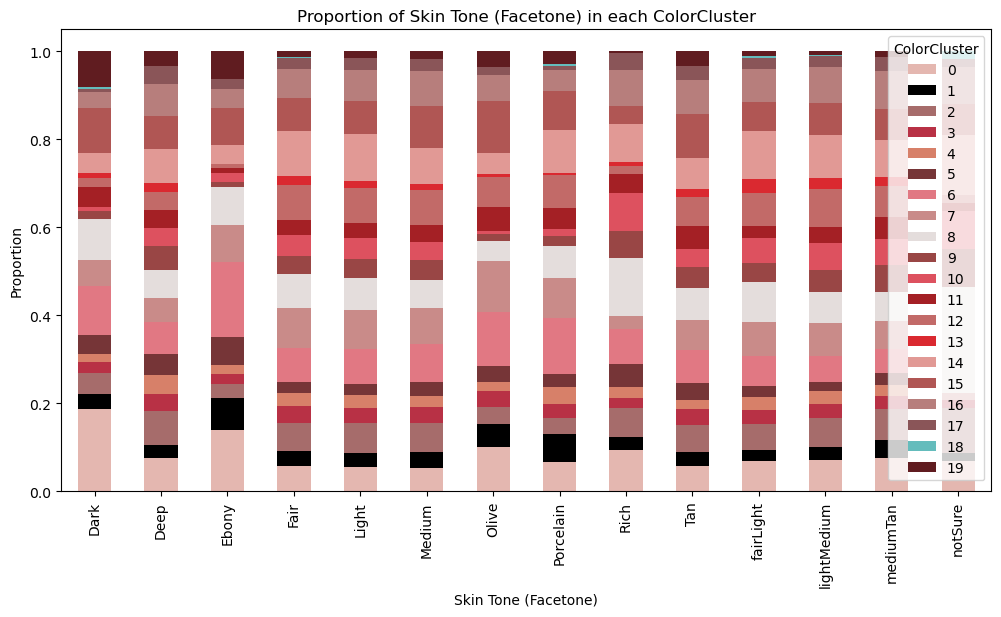

In [109]:
# Normalize the table to get proportions
facetone_cluster_table_norm = facetone_cluster_table.div(facetone_cluster_table.sum(axis=1), axis=0)

# Stacked bar chart
facetone_cluster_table_norm.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Proportion of Skin Tone (Facetone) in each ColorCluster")
plt.xlabel("Skin Tone (Facetone)")
plt.ylabel("Proportion")
plt.legend(title="ColorCluster")
plt.show()


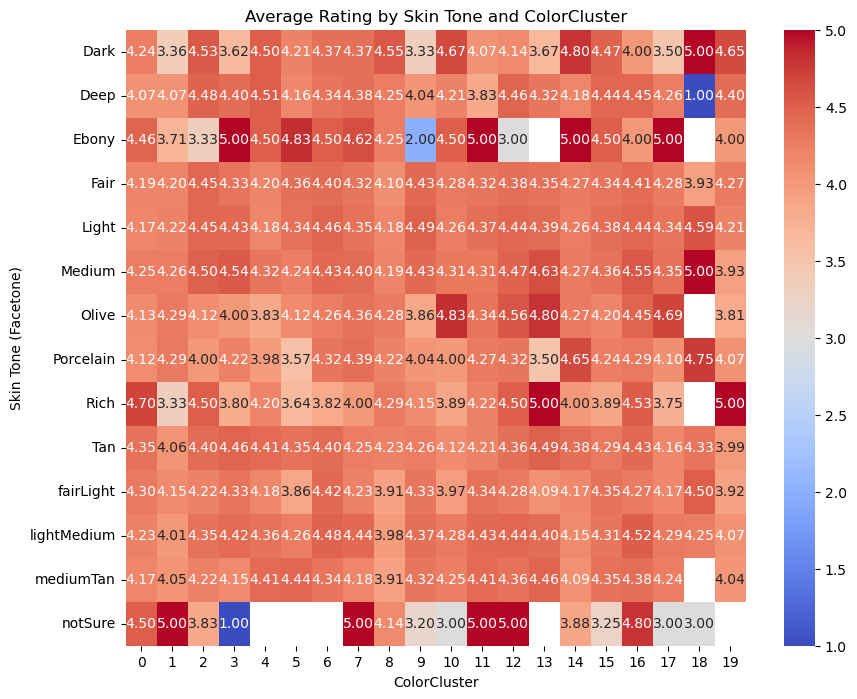

In [110]:
# Heatmap for the average rating by skin tone and color cluster
plt.figure(figsize=(10, 8))
sns.heatmap(facetone_cluster_avg_rating, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Average Rating by Skin Tone and ColorCluster")
plt.xlabel("ColorCluster")
plt.ylabel("Skin Tone (Facetone)")
plt.show()


![image.png](attachment:image.png)

In [111]:
# Create a pivot table to count reviews per rating, grouped by skin tone and cluster color
review_rating_table = df_review.pivot_table(
    index=['ContextDataValues.skinTone.ValueLabel', 'ColorCluster'],
    columns='Rating',
    values='reviewID',  # Assuming 'reviewID' uniquely identifies each review
    aggfunc='count',
    fill_value=0  # Fill missing values with 0
).reset_index()
review_rating_table


Rating,ContextDataValues.skinTone.ValueLabel,ColorCluster,1,2,3,4,5
0,Dark,0,6,0,8,5,40
1,Dark,1,3,1,1,1,5
2,Dark,2,1,0,1,1,12
3,Dark,3,2,0,0,3,3
4,Dark,4,0,0,1,1,4
...,...,...,...,...,...,...,...
265,notSure,14,2,0,0,1,5
266,notSure,15,0,1,2,0,1
267,notSure,16,0,0,0,1,4
268,notSure,17,0,0,1,0,0


In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Melt the DataFrame to transform it for easier plotting
review_rating_table_melted = review_rating_table.melt(
    id_vars=['ContextDataValues.skinTone.ValueLabel', 'ColorCluster'],
    var_name='Rating',
    value_name='Review_Count'
)


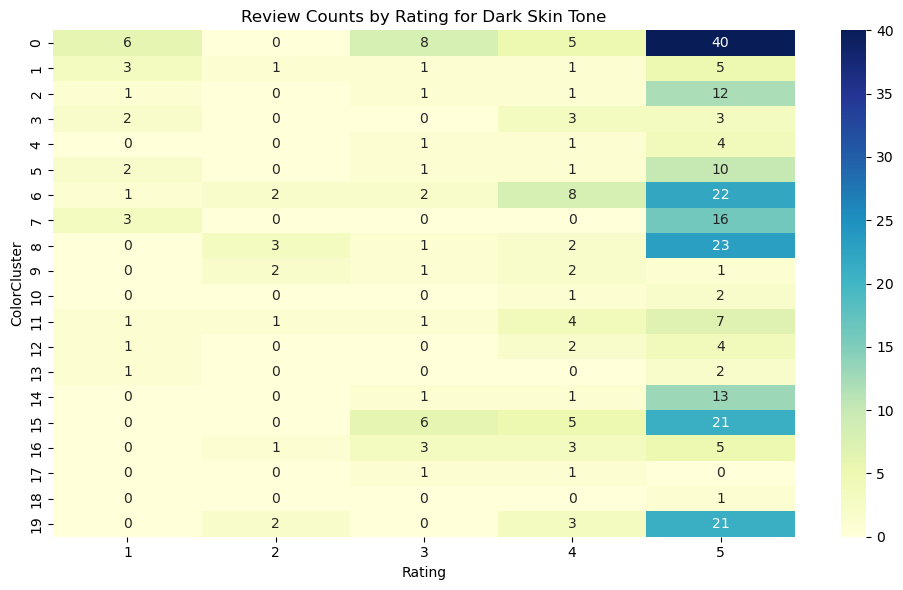

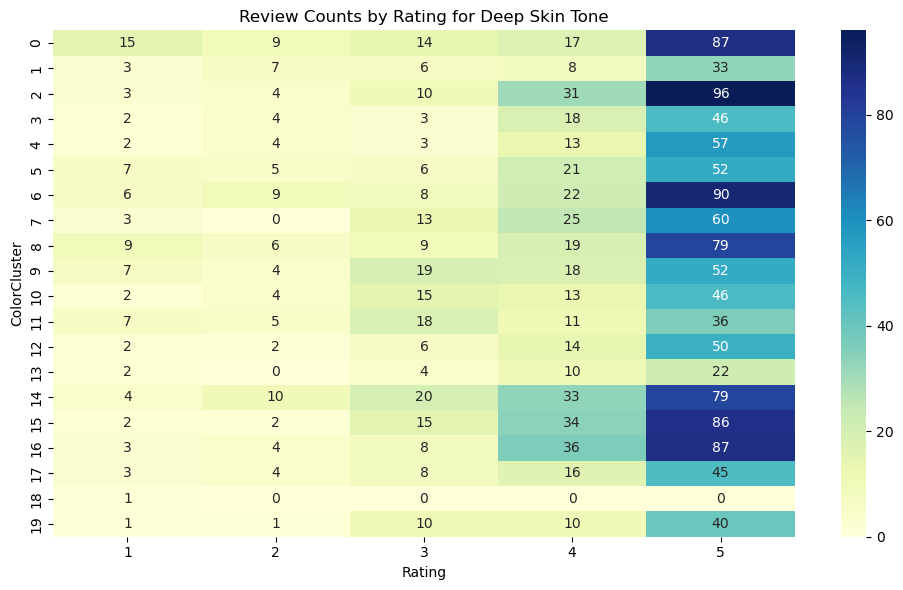

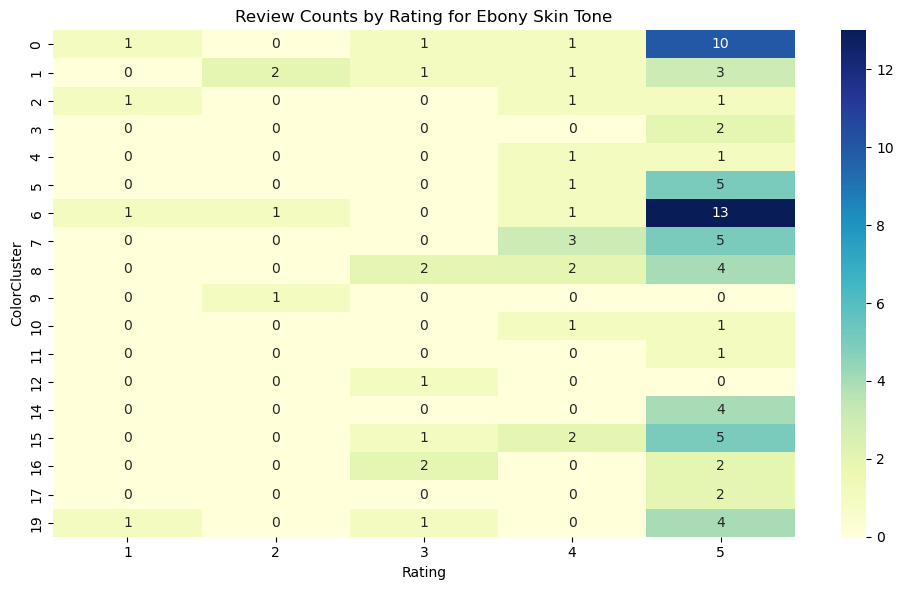

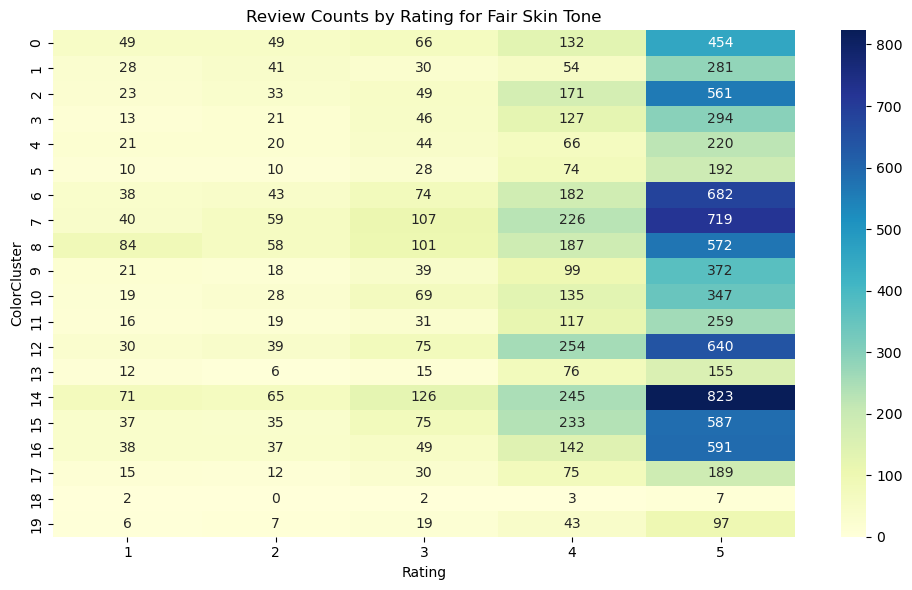

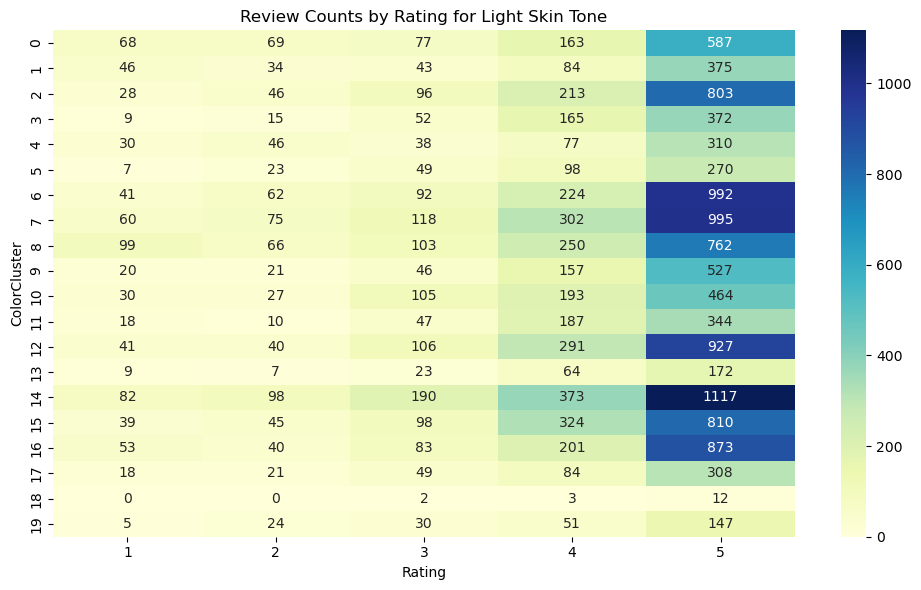

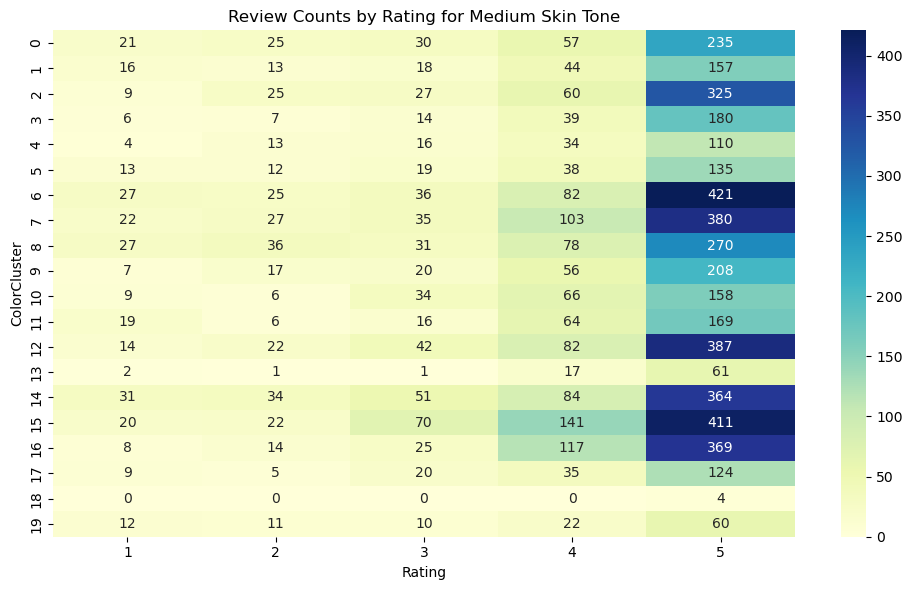

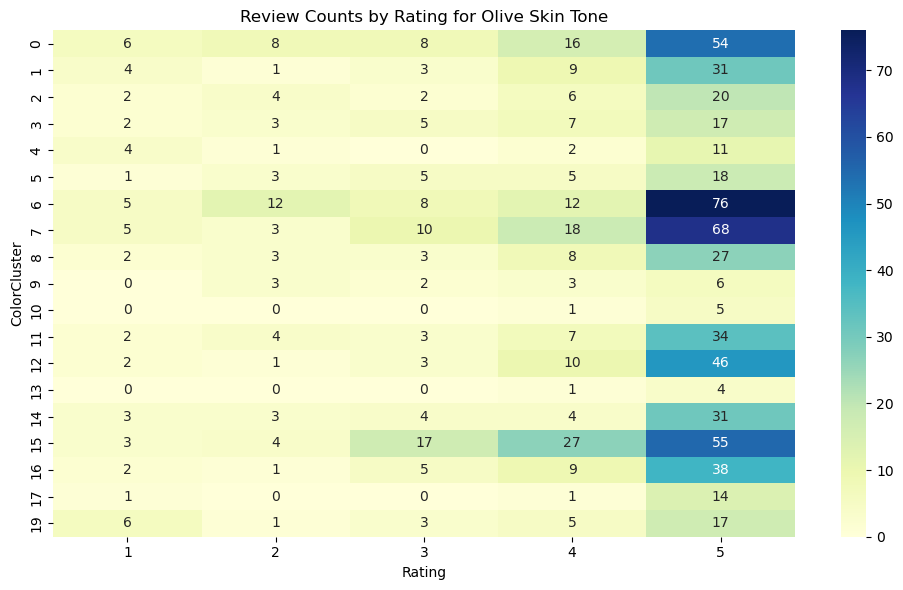

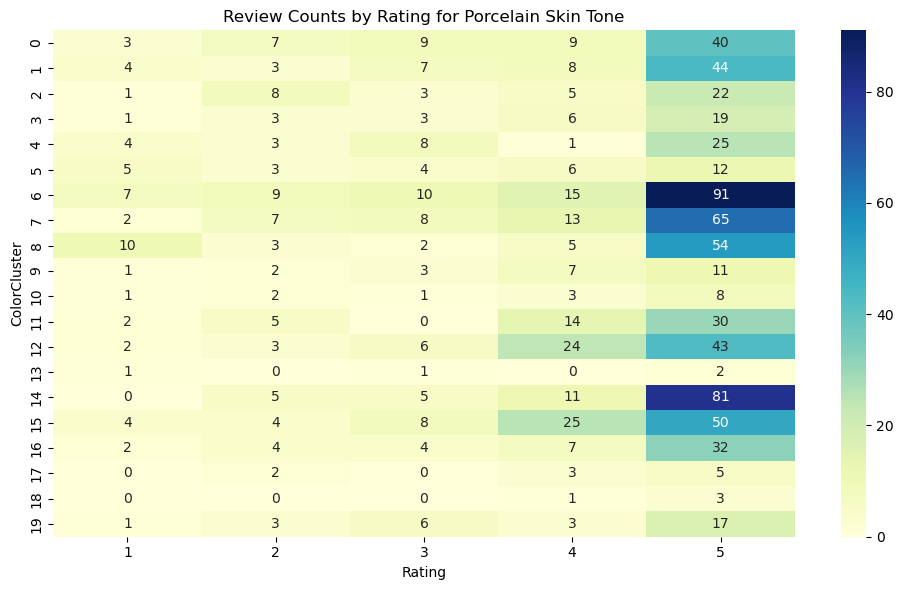

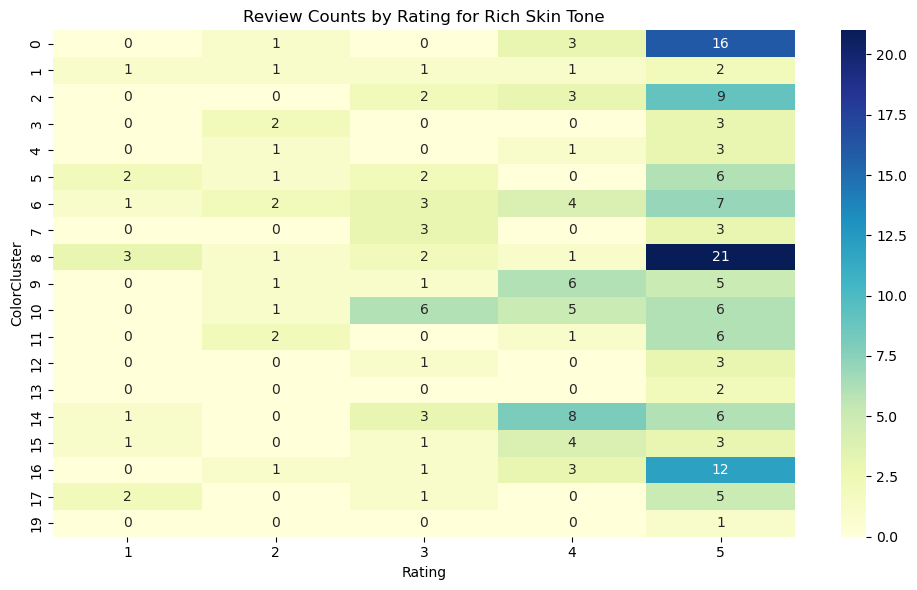

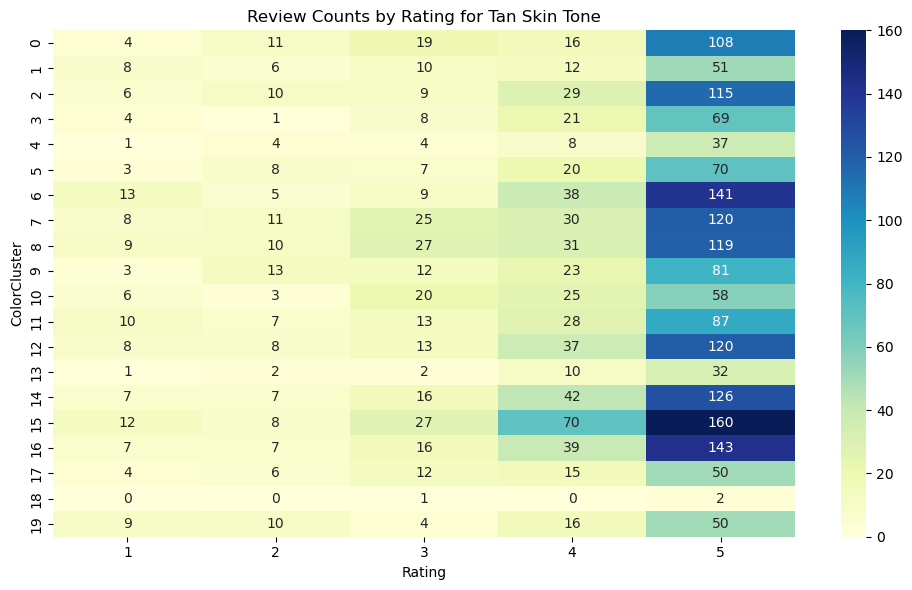

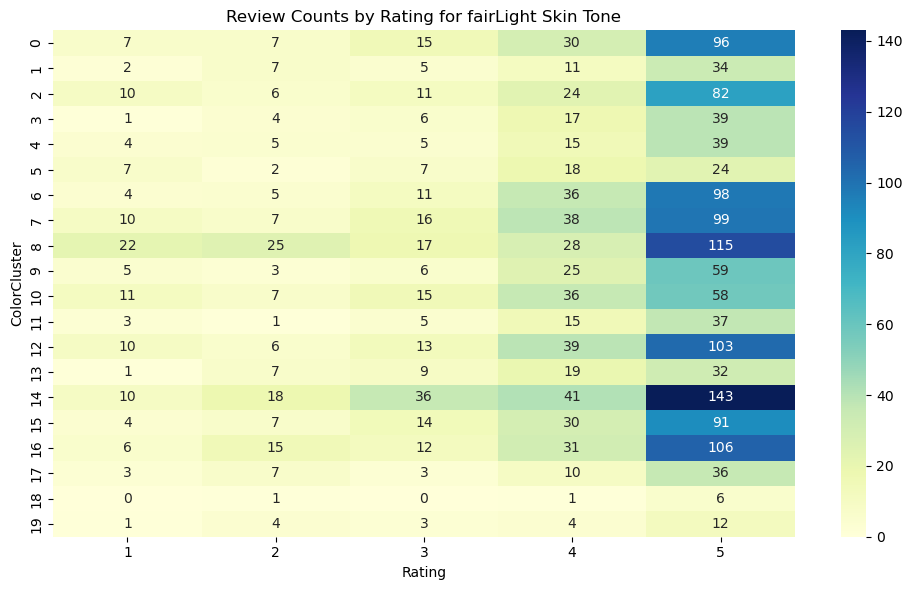

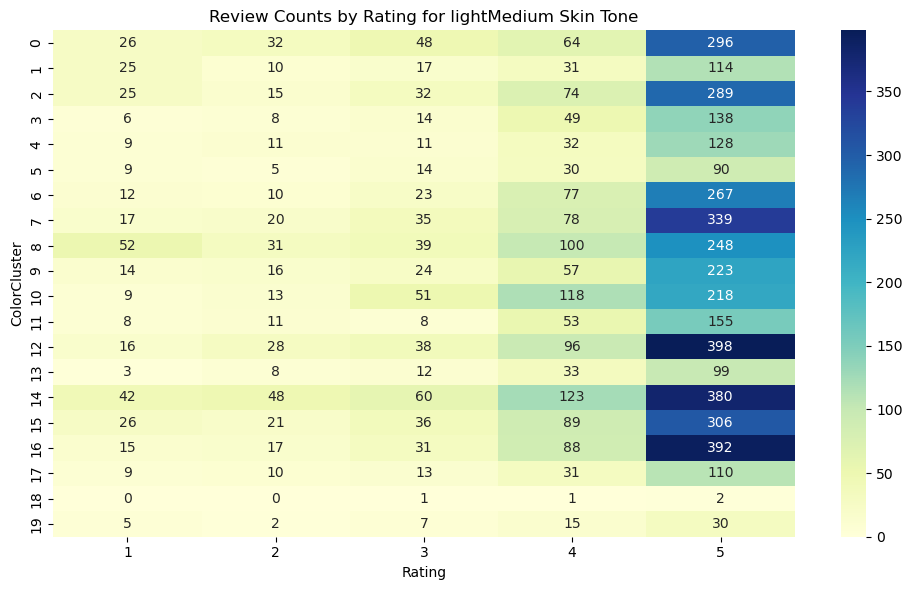

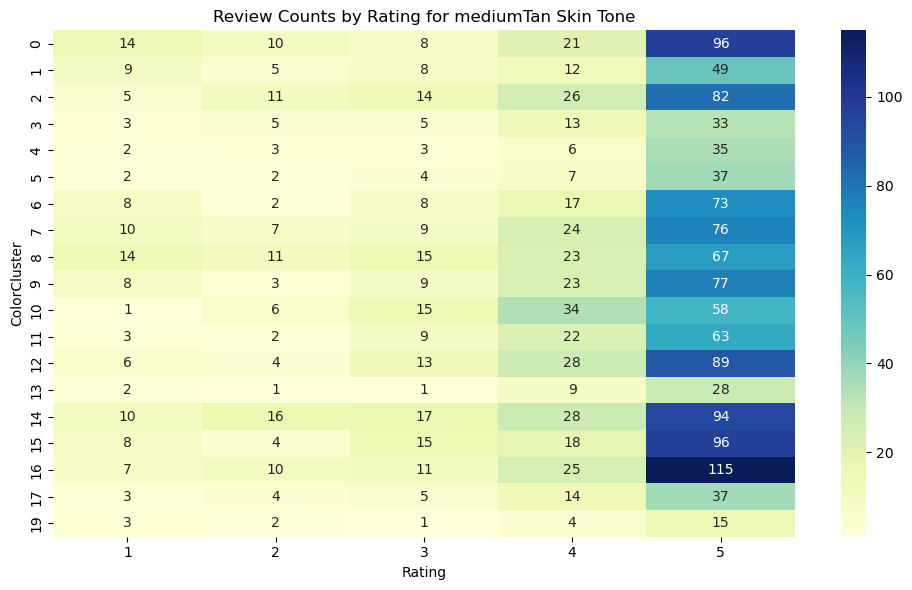

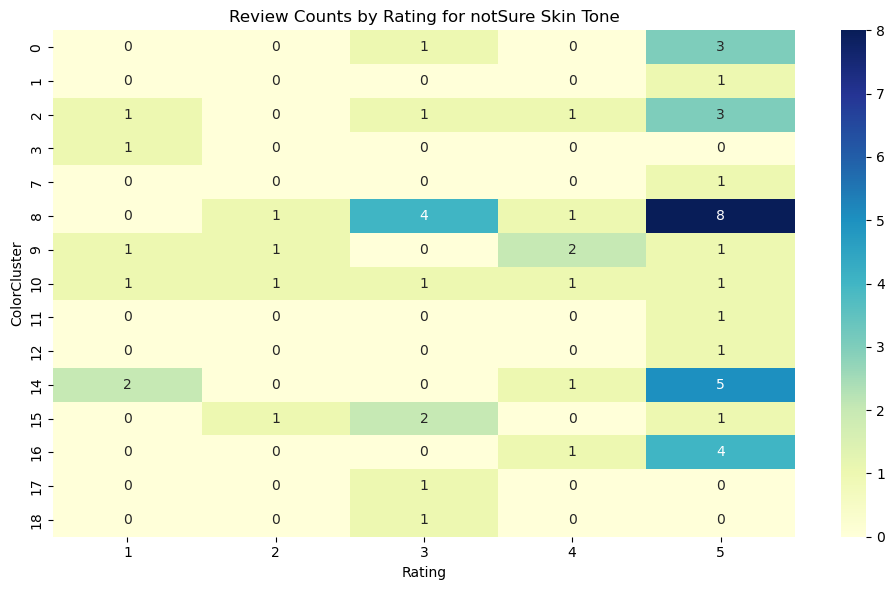

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the unique skin tones
skin_tones = review_rating_table['ContextDataValues.skinTone.ValueLabel'].unique()

# Loop through each skin tone to create a heatmap
for skin_tone in skin_tones:
    # Filter the data for the specific skin tone
    subset = review_rating_table_melted[review_rating_table_melted['ContextDataValues.skinTone.ValueLabel'] == skin_tone]
    
    # Create a pivot table for the heatmap
    pivot_table = subset.pivot(index='ColorCluster', columns='Rating', values='Review_Count')
    
    # Plot the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
    
    # Customize plot
    plt.title(f"Review Counts by Rating for {skin_tone} Skin Tone")
    plt.xlabel("Rating")
    plt.ylabel("ColorCluster")
    plt.tight_layout()
    plt.show()


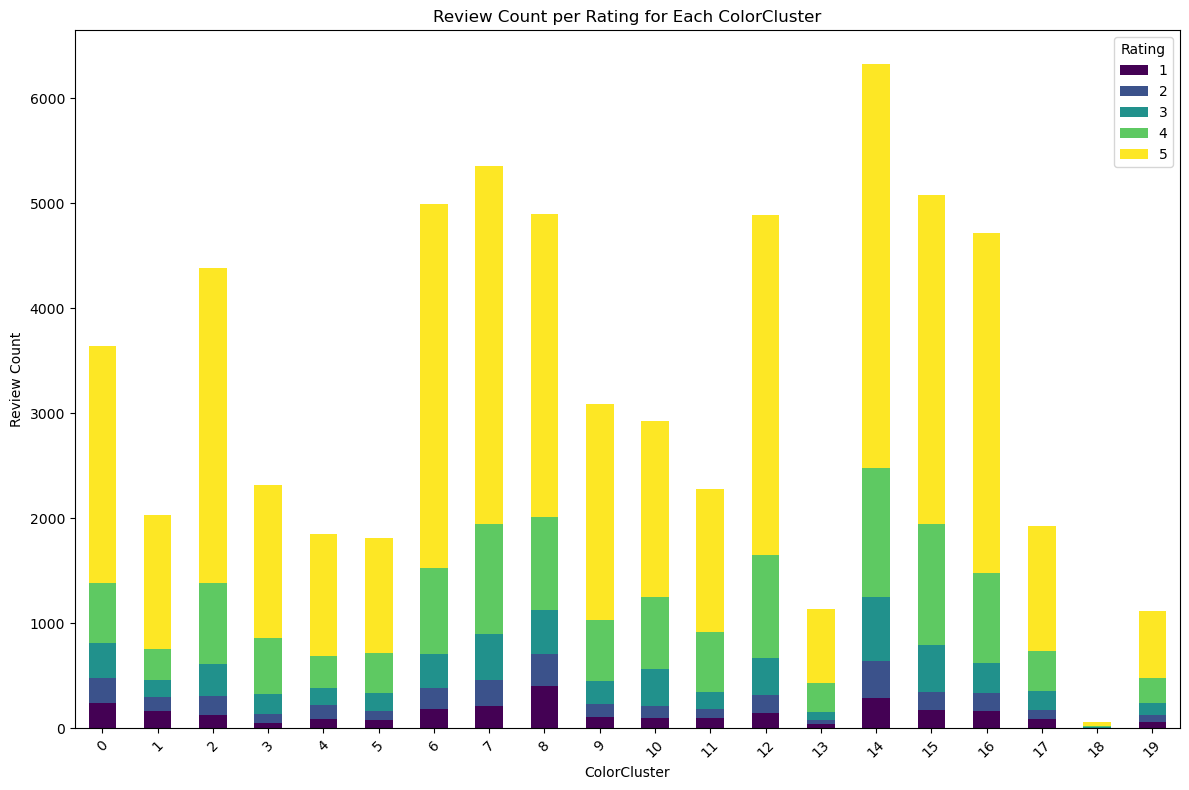

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by ColorCluster and Rating to get the review count
cluster_rating_counts = df_review.groupby(['ColorCluster', 'Rating']).size().reset_index(name='Review_Count')

# Create a pivot table for easy stacking in the bar chart
pivot_table = cluster_rating_counts.pivot(index='ColorCluster', columns='Rating', values='Review_Count').fillna(0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")

# Customize plot
plt.title("Review Count per Rating for Each ColorCluster")
plt.xlabel("ColorCluster")
plt.ylabel("Review Count")
plt.legend(title="Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [299]:
#df_review.loc[(df_review['ColorCluster']==5) & (df_review['productID']=='P404831')].to_excel('df_review_5.xlsx')

In [122]:
#df_review.loc[df_review['productID'] == 'P404831']

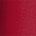

In [119]:

import base64
from PIL import Image
from io import BytesIO


base64_img_data = df_review.loc[df_review['reviewID'] == '178164345', 'lipstick_image_base64'].values[0]
#base64_img_data = df_product_selected['lipstick_image_base64'].iloc[2]

# Decode the base64 data and load it as an image
img_data = base64.b64decode(base64_img_data)
img = Image.open(BytesIO(img_data))

# Display the image
img

In [125]:
df_review.loc[df_review['ColorCluster'] == 1]

,reviewID,Rating,Title,ReviewText,Helpfulness,IsRecommended,SubmissionTime,ContextDataValues.skinType.ValueLabel,ContextDataValues.eyeColor.ValueLabel,ContextDataValues.hairColor.ValueLabel,ContextDataValues.skinTone.ValueLabel,ContextDataValues.age.ValueLabel,productID,skuID,cover_image_base64,lipstick_image_base64,avg_rgb,color_description,brandName,displayName,heroImage,altImage,ColorCluster_x,ClusterColorDescription_x,ColorCluster_y,ClusterColorDescription_y,ColorCluster,ClusterColorDescription
7576,178811252,4,Premium & Clean Product,This is very well made natural lip balm. I’ve ...,NaN,True,2021-04-29T18:13:54.000+00:00,NaN,NaN,NaN,NaN,NaN,P302103,1378215,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMDAwMDAwQEBA...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Translucent,fresh,Sugar Advanced Therapy Treatment Lip Balm,https://www.sephora.com/productimages/sku/s137...,https://www.sephora.com/productimages/sku/s137...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
7577,178502565,5,None,This is my absolute favourite lip treatment. I...,NaN,True,2021-04-25T12:14:23.000+00:00,Normal,Blue,Brunette,Light,NaN,P302103,1378215,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMDAwMDAwQEBA...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Translucent,fresh,Sugar Advanced Therapy Treatment Lip Balm,https://www.sephora.com/productimages/sku/s137...,https://www.sephora.com/productimages/sku/s137...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
7578,178491772,1,Don’t believe the hype,"Save your money, This is the most basic lip ba...",0.428571,False,2021-04-25T01:42:32.000+00:00,Normal,Blue,Blonde,Light,NaN,P302103,1378215,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMDAwMDAwQEBA...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Translucent,fresh,Sugar Advanced Therapy Treatment Lip Balm,https://www.sephora.com/productimages/sku/s137...,https://www.sephora.com/productimages/sku/s137...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
7579,178431799,5,Great lip balm,"This is a great lip balm, but it doesn't last ...",NaN,True,2021-04-23T22:12:10.000+00:00,Combination,Green,Brunette,Light,NaN,P302103,1378215,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMDAwMDAwQEBA...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Translucent,fresh,Sugar Advanced Therapy Treatment Lip Balm,https://www.sephora.com/productimages/sku/s137...,https://www.sephora.com/productimages/sku/s137...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
7580,178208774,2,Below average,It was a part of 2020's lip balm kit and I wan...,0.500000,False,2021-04-20T20:55:14.000+00:00,Combination,Green,Brunette,Fair,NaN,P302103,1378215,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAMDAwMDAwQEBA...,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Translucent,fresh,Sugar Advanced Therapy Treatment Lip Balm,https://www.sephora.com/productimages/sku/s137...,https://www.sephora.com/productimages/sku/s137...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64801,268094530,5,"Beautiful, dewy colour!",Literally drove all over Florida trying to get...,1.000000,True,2024-01-06T19:06:47.000+00:00,Normal,Brown,NaN,Medium,NaN,P506509,2709368,,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdW...,"[0, 0, 0]",Out of stock: Strawberry Pop,Fenty Beauty by Rihanna,Match Stix Color-Adaptive Cheek + Lip Stick,https://www.sephora.com/productimages/sku/s270...,https://www.sephora.com/productimages/sku/s270...,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint,1,Bare Pink sheer pink tint
64802,265012677,5,I LOVE IT!! HIGHLY RECOMMEND,Words can not describe how much I love this pr...,1.000000,True,2023-12-03T04:36:19.000+00:00,Oily,NaN,NaN,Light,NaN,P506509,2709368,,/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAA

In [126]:
df_review.shape

(64826, 28)

In [127]:
df_review.productID.nunique()

220

In [128]:
df_review.skuID.nunique()

1132